In this notebook, our aim to apply several machine learning algorithm that we learn in lesson like KMeans Clustering, KNN, PCA and also dimensionality reduction algorithms like Isomap, MDS which are derived at Ethem Alpaydın's Introduction to Machine Learning book. Apart from other notebooks, we analysed genres data of movies as our features for recommendation models. We implement KNN algorithm which suggest recommendation with respect to cosine similarities of genre vectors.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
# pass in column names for each CSV
u_cols = ['User_ID', 'Age', 'Sex', 'Occupation', 'Zip_Code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')
users = users.drop(columns=['Zip_Code'])

r_cols = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings = ratings.drop(columns=['Timestamp'])

m_cols = ['Movie_ID', 'Title', 'Release_Date', 'Video_Release_Date', 'Imdb_URL','Unknown',\
          'Action','Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', \
          'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical' , 'Mystery','Romance','Sci-Fi',\
          'Thriller', 'War', 'Western' ]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')
movies_genres = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols,  encoding='latin-1')
movies = movies.drop(columns=['Video_Release_Date', 'Imdb_URL'])

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.head(5)

,Movie_ID,Title,Release_Date,User_ID,Rating,Age,Sex,Occupation
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired


In [3]:
m_cols = ['Movie_ID', 'Title', 'Release_Date', 'Video_Release_Date', 'Imdb_URL','Unknown',\
          'Action_G','Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', \
          'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical' , 'Mystery','Romance','Sci-Fi',\
          'Thriller', 'War', 'Western' ]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols,  encoding='latin-1')
movies_genres.head()

,Movie_ID,Title,Release_Date,Video_Release_Date,Imdb_URL,Unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Find Similarity by User Ratings 

In [4]:
# Returns similarities by calculating pairwise correlations for selected movie
def show_similar_movies(movie_name, popularity_threshould):
    movieRatings = lens.pivot_table(index=['User_ID'],columns=['Title'],values='Rating')
    selectedRating = movieRatings[movie_name]
    similarMovies = movieRatings.corrwith(selectedRating)
    similarMovies = similarMovies.dropna()
    similarMovies_df = pd.DataFrame(similarMovies)
    moviesPopularity = lens.groupby('Title').agg({'Rating': [np.size, np.mean]})
    popular = moviesPopularity['Rating']['size'] >= popularity_threshould
    result = moviesPopularity[popular].join(pd.DataFrame(similarMovies, columns=['similarity']))
    result = result.sort_values(['similarity'], ascending=False)
    return result

similarMovies = show_similar_movies('Star Wars (1977)', 10)
similarMovies.head()

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Rating, size)","(Rating, mean)",similarity
Title,,,
Star Wars (1977),583,4.358491,1.000000
Love in the Afternoon (1957),10,3.900000,0.923381
Unhook the Stars (1996),10,2.500000,0.771744
That Old Feeling (1997),11,3.363636,0.750000
"Empire Strikes Back, The (1980)",367,4.204360,0.747981


In [5]:
similarMovies = show_similar_movies('Star Wars (1977)', 200)
similarMovies.head()

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Rating, size)","(Rating, mean)",similarity
Title,,,
Star Wars (1977),583,4.358491,1.000000
"Empire Strikes Back, The (1980)",367,4.204360,0.747981
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
"Sting, The (1973)",241,4.058091,0.367538


Just considering correlation with respect to user ratings is not sufficient for recommendation. As we increase rating size, the suggestions becomes more reliable unless they have less similarity. We can consider correlations with respect to movies' genres.

Check least similar ones for anaylsing similarity metrics

In [6]:
similarMovies = show_similar_movies('Star Wars (1977)', 200)
similarMovies.tail()

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Rating, size)","(Rating, mean)",similarity
Title,,,
Phenomenon (1996),244,3.557377,-0.022359
Dead Man Walking (1995),299,3.896321,-0.034158
Ransom (1996),267,3.644195,-0.035184
"Time to Kill, A (1996)",232,3.685345,-0.042790
Murder at 1600 (1997),218,3.087156,-0.064778


Return normalized rating size as dataframe as popularity feature.

In [7]:
moviesPopularity = lens.groupby('Movie_ID').agg({'Rating': [np.size, np.mean]})
movieRating = pd.DataFrame(moviesPopularity['Rating']['size'])
movieRatingNorm = (movieRating - movieRating.min()) / (movieRating.max() - movieRating.min())
movieRatingNorm.columns = ['popularity']
movieRatingNorm
movieRatingNorm.sort_values(by=['popularity'],ascending=False).head(5)


,popularity
Movie_ID,
50,1.000000
258,0.872852
100,0.871134
181,0.869416
294,0.831615


In [8]:
movies_genres[movies_genres['Movie_ID']==50]

,Movie_ID,Title,Release_Date,Video_Release_Date,Imdb_URL,Unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0


### Similarities by Movies Genres

Text(0.5,1,'Clustered Correlation Graph')

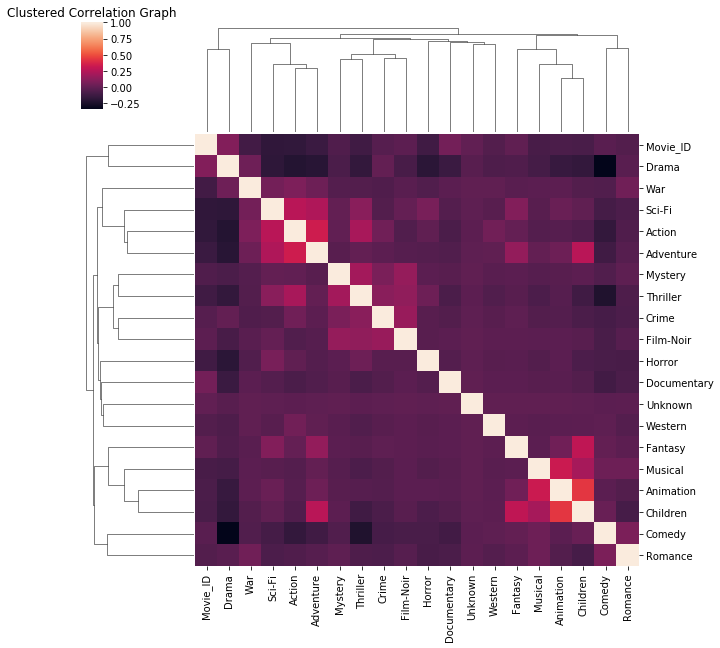

In [9]:
model = movies_genres[['Movie_ID', 'Unknown',\
          'Action','Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', \
          'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical' , 'Mystery','Romance','Sci-Fi',\
          'Thriller', 'War', 'Western' ]]

model_corr = model.corr()
fig = sns.clustermap(model_corr)
plt.title('Clustered Correlation Graph')

We have 19 different genres. In Clustered Correlation Graph, by analysing dendogram we can consider number of similarity clusters.

In [10]:
genre_matrix = movies_genres[[ 'Unknown',\
          'Action','Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', \
          'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical' , 'Mystery','Romance','Sci-Fi',\
          'Thriller', 'War', 'Western' ]].as_matrix()

genre_matrix

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Applying Dimensionality Reduction Algorithms for Movie Genre Classification

We simply applied dimensionality reduction (chapter 6) algorithms from Ethem Alpaydın's book to analyse how they will seperate movies genres. 

We have 19 dimensional genre data and we will reduce it to 2 dimensional for visualization.
We will apply 4 clusters as a result of dendrogram. 

Since genres have more than one category, we cannot assign 19 labels to classify data. 
(Label encoding can be used, but at this level, we will use these algorithms for visualization)
We can also analyse linearly seperability.


In [19]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4)
t = cluster.fit_predict(genre_matrix)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(genre_matrix)
genre_reduced = pca.transform(genre_matrix)
genre_reduced

array([[ 0.80600689, -0.41113641],
       [ 0.34032229,  1.30357602],
       [ 0.15884372,  0.60255269],
       ...,
       [-0.62455136, -0.31059781],
       [ 0.69656176, -0.43908352],
       [-0.67125219, -0.15619349]])

In [21]:
print("We loss "+ str(1 - pca.explained_variance_ratio_.sum()) + " percent of data by applying PCA!")

We loss 0.594721426761407 percent of data by applying PCA!


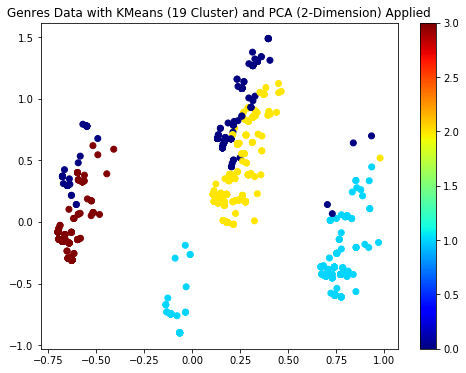

In [22]:
#cluster.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(genre_reduced[:,0], genre_reduced[:,1], c=t, cmap="jet")
plt.title("Genres Data with KMeans (19 Cluster) and PCA (2-Dimension) Applied")
plt.colorbar()
plt.show()


Isomap calculates geodesic distance in the distance along the manifold as opposed to Euclidean distance. [1]

MDS can be used dimensionality reduction by calculating pairwise Euclidean distances in the d-dimensional x space. [1]

TSNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. [2]

1. Alpaydın, Ethem Introduction to machine learning 3rd Editiom
2. http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [23]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(genre_matrix)

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(genre_matrix)


mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(genre_matrix)

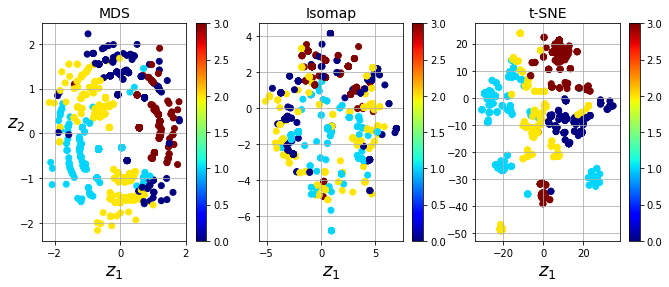

In [24]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap="jet")
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.colorbar()
    plt.grid(True)

plt.show()

Isomap and PCA can be prefered with respect to other algorithms. Finding suitable distance metric seems more suitable for seperability.

In [25]:
lens.head()

,Movie_ID,Title,Release_Date,User_ID,Rating,Age,Sex,Occupation
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired


## Analysing Distance Function for Genres

### Cosine Similarity 

Measures the similarity between two non-zero vectors of an inner product space. 

similarity = cos(Q) = (A.B) / |A|*|B|

Similarity values for similar vectos will goes to 0 since their inner product is 0. Similarity goes to 1 for irrelevant vectors. 

In [26]:
from scipy.spatial import distance
movie_a = int(lens.Movie_ID[lens.Title =='Star Wars (1977)'][:1])
movie_b = int(lens.Movie_ID[lens.Title =='Empire Strikes Back, The (1980)'][:1])
movie_c = int(lens.Movie_ID[lens.Title =='Murder at 1600 (1997)'][:1])
# Genre_matrix index starts from 0 and corresponding Movie_ID starts from 1. 
genre_a = genre_matrix[movie_a-1]
genre_b = genre_matrix[movie_b-1]
genre_c = genre_matrix[movie_c-1]
print("Cosine similarity of similar movies is "+ str(distance.cosine(genre_a, genre_b)))
print("Cosine similarity of irrelevant movies is "+ str(distance.cosine(genre_a, genre_c)))

Cosine similarity of similar movies is 0.08712907082472321
Cosine similarity of irrelevant movies is 1.0


In [27]:
print("Euclidean distance of similar movies is "+ str(distance.euclidean(genre_a, genre_b)))
print("Euclidean distance of irrelevant movies is "+ str(distance.euclidean(genre_a, genre_c)))

Euclidean distance of similar movies is 1.0
Euclidean distance of irrelevant movies is 2.6457513110645907


In [28]:
def Divergence(x,y,p=2.):
    e = x - y
    if np.isscalar(p):
        return np.sum(np.abs(e)**p)
    else:
        return np.sum(np.matrix(e)*p*np.matrix(e).T)

In [29]:
Divergence(movie_a,movie_b,p=1)

122

In [30]:
Divergence(movie_a,movie_c,p=2)

73984

By analysing several distance functions (cosine similarities, norm balls, euclidean distances), we decide to use cosine similarities at our KNN model.

## Movies Recommendation by K Nearest Neighbor (by considering genres)

In [31]:
import operator
from scipy.spatial import distance

def knn_movies(refMovie, K):
    refMovie = 50
    K = 4
    distances = []
    for movie in movies_genres.Movie_ID:
        if (movie != refMovie):
            dist1 = genre_matrix[movie-1]
            dist2 = genre_matrix[refMovie-1]
            dist = distance.cosine(dist1, dist2)
            distances.append((movie, dist))
    # Least distance means for similar movies w.r.t type.
    distances.sort(key=operator.itemgetter(1))
    # Get K of similar movies as neigbors
    neighbors = []
    for i in range(K):
        # Get Movie_ID for neighbors
        neighbors.append(distances[i][0])
    return neighbors,distances

refMovie =  50
numberofneighbors = 4
neighbors, distances = knn_movies(refMovie, numberofneighbors)
                               
movie = movies_genres[movies_genres['Movie_ID'] == refMovie].Title.values[0]
title = "Recommended movies {} movies for {} ".format(numberofneighbors, movie)
print(title)
movies_genres[movies_genres['Movie_ID'].isin(neighbors)]

Recommended movies 4 movies for Star Wars (1977) 


,Movie_ID,Title,Release_Date,Video_Release_Date,Imdb_URL,Unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
171,172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
180,181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
270,271,Starship Troopers (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Starship+Troo...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
497,498,"African Queen, The (1951)",01-Jan-1951,NaN,http://us.imdb.com/M/title-exact?African%20Que...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0


Use Euclidean Distance for comparison

In this notebook, considering movies genres feature can also provide relevant recommendations. To improve accuracy they may be used at hybrid model. 